In [11]:
# Importing Libraries

# Utitlity Libraries
import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithm, Evaluation, and Model Libraries 
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from xgboost import XGBClassifier


In [12]:
# Importing Libraries

# Utitlity Libraries
import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithm, Evaluation, and Model Libraries 
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from xgboost import XGBClassifier


In [13]:
# Loading Data

# Importing Dataset
data = pd.read_csv("C:\\customerchurn\\Churn.csv")
# Printing Data
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
data.shape

(7043, 21)

In [15]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
pip install sns

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2670 sha256=9e0b6a3ef233f8ba28519755a6a10ee2e2035c6114585e8b9e07262a79290776
  Stored in directory: c:\users\rubim\appdata\local\pip\cache\wheels\76\1a\47\c3b6a8b9d3ae47b1488f4be13c86586327c07e0ac1bb5b3337
Successfully built sns
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rubim\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rubim\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


TypeError: countplot() got multiple values for argument 'data'

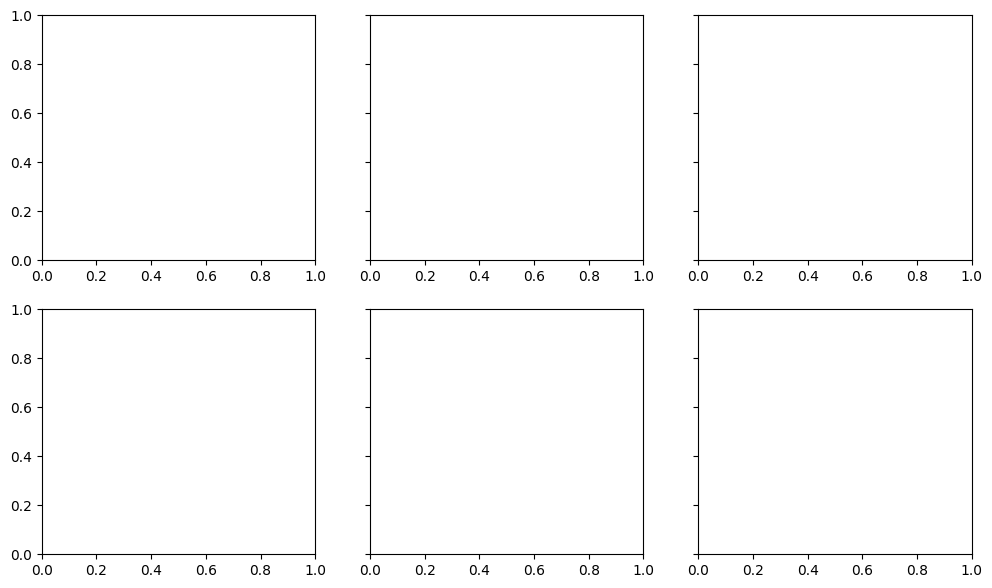

In [22]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
    sns.countplot("gender", data=data, ax=axes[0,0])
    sns.countplot("SeniorCitizen", data=data, ax=axes[0,1])
    sns.countplot("Partner", data=data, ax=axes[0,2])
    sns.countplot("Dependents", data=data, ax=axes[1,0])
    sns.countplot("PhoneService", data=data, ax=axes[1,1])
    sns.countplot("PaperlessBilling", data=data, ax=axes[1,2])

In [23]:
with sns.color_palette("pastel"):
    sns.countplot("InternetService", data=data)

TypeError: countplot() got multiple values for argument 'data'